In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.applications import MobileNet, MobileNetV2, MobileNetV3Small, MobileNetV3Large
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import ResNet50, ResNet50V2, ResNet101, ResNet101V2, ResNet152, ResNet152V2
from tensorflow.keras.applications import InceptionV3, InceptionResNetV2
from tensorflow.keras.layers import Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Google Drive 마운트

In [2]:
from google.colab import drive   

drive.mount('/content/gdrive/')  

Mounted at /content/gdrive/


In [3]:
# 파일 다운로드

import shutil

shutil.copy('/content/gdrive/My Drive/Colab Notebooks/dataset/dog_image.zip', '/content/')

'/content/dog_image.zip'

# ROOT_DIR 설정 (Colab 이외의 환경에서는 ROOT_DIR 을 변경해주면 된다)

In [4]:
import os

ROOT_DIR = '/content'

DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'dog_image')

TRAIN_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'train/')

VALIDATION_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'train/')

TEST_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'test/')

TEST_IMAGE_FILES_DIR = os.path.join(DATA_ROOT_DIR, 'test_image_files/')

In [5]:
import os
import shutil

# 작업 디렉토리는 dog_image

if os.path.exists(DATA_ROOT_DIR):

    shutil.rmtree(DATA_ROOT_DIR)
    print(DATA_ROOT_DIR + ' is deleted !!')

In [6]:
# 압축파일 풀기

import zipfile

with zipfile.ZipFile(os.path.join(ROOT_DIR, 'dog_image.zip'), 'r') as target_file:

    target_file.extractall(DATA_ROOT_DIR) 

In [7]:
# 데이터 전체 개수 확인

import os
import glob

# 데이터 정답 (label) 개수 및 종류 확인

label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)

print('total label nums = ', len(label_name_list))
print('=================================================')
print(label_name_list)

total label nums =  4
['shepherd', 'chihuahua', 'jindo_dog', 'yorkshire_terrier']


# test 디렉토리는 ImageDataGenerator 이용해서 test 용도로 사용되며,  test_image_files 디렉토리는 정답별로 분리된 test 파일들을 그대로 복사해 놓은 디렉토리임. 목적은 전체 정확도가 아닌 random 하게 선택해서 정답과 예측 값을 직접 확인하기 위함.

validation 은 validation_split 이용해서 실행

In [8]:
import os
import shutil

if not os.path.exists(TEST_DATA_ROOT_DIR):    
    
    os.mkdir(TEST_DATA_ROOT_DIR)
    print(TEST_DATA_ROOT_DIR + ' is created !!!')

if not os.path.exists(TEST_IMAGE_FILES_DIR):    
    
    os.mkdir(TEST_IMAGE_FILES_DIR)
    print(TEST_IMAGE_FILES_DIR + ' is created !!!')

/content/dog_image/test/ is created !!!
/content/dog_image/test_image_files/ is created !!!


# train 디렉토리에서 에서 test 디렉토리로 먼저 move 한후, test 디렉토리에서 test_image_files 디렉토리로는 copy

먼저 train -> test 디렉토리로 ratio 만큼 move

In [9]:
import os
import glob
import shutil
import random

# 분리 비율
ratio = 0.1    # train : test = 90 : 10

src_root_dir = TRAIN_DATA_ROOT_DIR
dst_root_dir = TEST_DATA_ROOT_DIR

# train 디렉토리에 먼저 label 디렉토리 생성함

label_name_list = os.listdir(src_root_dir)

count = 0

for label_name in label_name_list:

    dst_label_name_dir = dst_root_dir + label_name

    if not os.path.exists(dst_label_name_dir):
        os.mkdir(dst_label_name_dir)
        print(dst_label_name_dir + ' is created !!')
        count = count + 1

print(len(label_name_list), count)

# 파일 move src dir => dst dir

for label_name in label_name_list:

    train_image_file_list = glob.glob(src_root_dir+label_name+'/*')

    print('========================================================================')
    print('total [%s] image file nums => [%s]' % (label_name ,len(train_image_file_list)))

    # data shuffle
    split_num = int(ratio*len(train_image_file_list))

    print('split nums => ', split_num)

    # extract test data from train data
    test_image_file_list = train_image_file_list[0:split_num]

    move_nums = 0

    for image_file in test_image_file_list:

        shutil.move(image_file, dst_root_dir+label_name)    # move 

        move_nums = move_nums + 1

    print('total move nums => ', move_nums)
    print('========================================================================')

/content/dog_image/test/shepherd is created !!
/content/dog_image/test/chihuahua is created !!
/content/dog_image/test/jindo_dog is created !!
/content/dog_image/test/yorkshire_terrier is created !!
4 4
total [shepherd] image file nums => [376]
split nums =>  37
total move nums =>  37
total [chihuahua] image file nums => [365]
split nums =>  36
total move nums =>  36
total [jindo_dog] image file nums => [360]
split nums =>  36
total move nums =>  36
total [yorkshire_terrier] image file nums => [379]
split nums =>  37
total move nums =>  37


In [10]:
# train : test 데이터 비율 확인

src_root_dir = TRAIN_DATA_ROOT_DIR
dst_root_dir = TEST_DATA_ROOT_DIR

train_label_name_list = os.listdir(src_root_dir)
test_label_name_list = os.listdir(src_root_dir)

train_label_name_list.sort()
test_label_name_list.sort()

if train_label_name_list != test_label_name_list:
    print('fatal error !!!!')
else:
    print(len(train_label_name_list), len(test_label_name_list))

# 데이터 개수 확인

for label_name in train_label_name_list:

    train_data_nums = len(os.listdir(src_root_dir+label_name))
    test_data_nums = len(os.listdir(dst_root_dir+label_name))

    print('train => ', label_name, train_data_nums, ' , test => ', label_name, test_data_nums)
    print('=======================================================')

4 4
train =>  chihuahua 329  , test =>  chihuahua 36
train =>  jindo_dog 324  , test =>  jindo_dog 36
train =>  shepherd 339  , test =>  shepherd 37
train =>  yorkshire_terrier 342  , test =>  yorkshire_terrier 37


# test -> test_image_files 디렉토리로 copy

In [11]:
import os
import glob
import shutil
import random

src_root_dir = TEST_DATA_ROOT_DIR
dst_root_dir = TEST_IMAGE_FILES_DIR


label_name_list = os.listdir(src_root_dir)

# 파일 copy src dir => dst dir

for label_name in label_name_list:

    image_file_list = glob.glob(src_root_dir+label_name+'/*')

    print('========================================================================')
    print('total [%s] image file nums => [%s]' % (label_name ,len(train_image_file_list)))

    copy_nums = 0

    for image_file in image_file_list:

        shutil.copy(image_file, dst_root_dir)    # copy 

        copy_nums = copy_nums + 1

    print('total copy nums => ', copy_nums)
    print('========================================================================')

total [shepherd] image file nums => [379]
total copy nums =>  37
total [chihuahua] image file nums => [379]
total copy nums =>  36
total [jindo_dog] image file nums => [379]
total copy nums =>  36
total [yorkshire_terrier] image file nums => [379]
total copy nums =>  37


# 이미지 shape 설정 (크기가 커지면 정확도는 조금 올라가지만 학습시간이 오래 걸림)

In [12]:
IMG_WIDTH = 224  # 150
IMG_HEIGHT = 224  # 150

# ImageDataGenerator 설정

In [13]:
# ImageDataGenerator 이용하여 데이터 불러옴

train_datagen = ImageDataGenerator(rescale=1./255, 
                                    rotation_range=20, 
                                    width_shift_range=0.2, 
                                    height_shift_range=0.2, 
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    validation_split=0.15)

validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

In [14]:
train_generator = train_datagen.flow_from_directory(TRAIN_DATA_ROOT_DIR, 
                                                batch_size=16, 
                                                color_mode='rgb', 
                                                class_mode='sparse',
                                                subset = 'training',
                                                target_size=(IMG_WIDTH,IMG_HEIGHT))


validation_generator = validation_datagen.flow_from_directory(VALIDATION_DATA_ROOT_DIR, 
                                                          batch_size=16, 
                                                          color_mode='rgb', 
                                                          class_mode='sparse',
                                                          subset = 'validation',
                                                          target_size=(IMG_WIDTH,IMG_HEIGHT))

Found 1136 images belonging to 4 classes.
Found 198 images belonging to 4 classes.


In [15]:
# 정답 확인

print(train_generator.class_indices)

print(len(train_generator.classes))
print(len(validation_generator.classes))

print(train_generator.num_classes)
print(validation_generator.num_classes)

{'chihuahua': 0, 'jindo_dog': 1, 'shepherd': 2, 'yorkshire_terrier': 3}
1136
198
4
4


# Transfer Learning base 모델 구축

In [91]:
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH,IMG_HEIGHT,3))

234708992/234698864 [==============================] - 2s 0us/step


In [92]:
model = Sequential()

model.add(base_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))                  # Dropout(0.5) 오버피팅 발생함
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 7, 7, 2048)        58370944  
                                                                 
 global_average_pooling2d_5   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_10 (Dense)            (None, 32)                65568     
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 4)                 132       
                                                                 
Total params: 58,436,644
Trainable params: 58,285,220
Non-trainable params: 151,424
____________________________________

In [93]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(2e-5), metrics=['accuracy'])

In [94]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

save_file_name = './MyDogClassification_ResNet152_Colab.h5'

checkpoint = ModelCheckpoint(save_file_name,       # file명을 지정
                             monitor='val_loss',   # val_loss 값이 개선되었을때 호출
                             verbose=1,            # 로그를 출력
                             save_best_only=True,  # 가장 best 값만 저장
                             mode='auto'           
                            )

earlystopping = EarlyStopping(monitor='val_loss', # 모니터 기준 설정 (val loss) 
                              patience=5,        # 5회 Epoch동안 개선되지 않는다면 종료 
                              verbose=1 
                             )

start_time = datetime.now()

hist = model.fit(train_generator, epochs=20, validation_data=validation_generator)

end_time = datetime.now()

print('elapsed time => ', end_time-start_time)

Epoch 1/20
71/71 [==============================] - 94s 1s/step - loss: 0.8283 - accuracy: 0.6717 - val_loss: 1.5704 - val_accuracy: 0.2475
Epoch 2/20
71/71 [==============================] - 71s 994ms/step - loss: 0.3040 - accuracy: 0.9023 - val_loss: 1.6644 - val_accuracy: 0.2576
Epoch 3/20
71/71 [==============================] - 71s 993ms/step - loss: 0.1940 - accuracy: 0.9366 - val_loss: 1.5357 - val_accuracy: 0.2778
Epoch 4/20
71/71 [==============================] - 71s 992ms/step - loss: 0.1216 - accuracy: 0.9692 - val_loss: 2.1292 - val_accuracy: 0.2071
Epoch 5/20
71/71 [==============================] - 71s 992ms/step - loss: 0.1118 - accuracy: 0.9665 - val_loss: 1.6167 - val_accuracy: 0.2879
Epoch 6/20
71/71 [==============================] - 71s 993ms/step - loss: 0.0588 - accuracy: 0.9833 - val_loss: 1.3527 - val_accuracy: 0.3636
Epoch 7/20
71/71 [==============================] - 71s 992ms/step - loss: 0.0709 - accuracy: 0.9824 - val_loss: 1.3322 - val_accuracy: 0.4798
Ep

In [ ]:
#from google.colab import files

#files.download('MyDogClassification_Xception_Colab.h5')

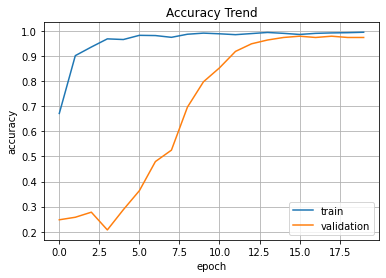

In [95]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

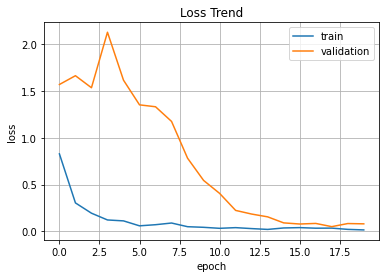

In [96]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

# test data 에 대한 정확도 평가

In [97]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [98]:
test_generator = test_datagen.flow_from_directory(TEST_DATA_ROOT_DIR, 
                                              batch_size=32,
                                              color_mode='rgb',
                                              class_mode='sparse',
                                              target_size=(IMG_WIDTH,IMG_HEIGHT))

Found 146 images belonging to 4 classes.


In [99]:
model.evaluate(test_generator)

5/5 [==============================] - 3s 483ms/step - loss: 0.1114 - accuracy: 0.9589


[0.11138555407524109, 0.9589040875434875]

# random 이미지 데이터에 대해 predict 실행

In [100]:
import random
import os
import numpy as np
import cv2
import glob

label_dict = {'chihuahua': 0, 'jindo_dog': 1, 'shepherd': 2, 'yorkshire_terrier': 3}

test_image_files_list = glob.glob(os.path.join(TEST_IMAGE_FILES_DIR, '*.jpg'))

random.shuffle(test_image_files_list)

# 파일형식은 정답.숫자.jpg 이므로 정답을 분리할수 있다

test_num = 16

test_image_files = test_image_files_list[:test_num]

print(test_image_files)

label_list = []

for i in range(len(test_image_files)):

    label = test_image_files[i].split('/')[-1].split('.')[0].strip()

    label_list.append(label_dict[label])

print(label_list)

# 이미지 파일 읽어옴

src_img_list = []

for i in range(len(test_image_files)):

    src_img = cv2.imread(test_image_files[i], cv2.IMREAD_COLOR)

    src_img = cv2.resize(src_img, dsize=(IMG_WIDTH, IMG_HEIGHT))

    src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)

    src_img = src_img / 255.0

    src_img_list.append(src_img)

# 4차원 텐서  변환

src_img_array = np.array(src_img_list)
label_array = np.array(label_list)

print(src_img_array.shape, label_array.shape)

print(label_array)

['/content/dog_image/test_image_files/jindo_dog.72.jpg', '/content/dog_image/test_image_files/yorkshire_terrier.67.jpg', '/content/dog_image/test_image_files/chihuahua.37.jpg', '/content/dog_image/test_image_files/shepherd.27.jpg', '/content/dog_image/test_image_files/yorkshire_terrier.331.jpg', '/content/dog_image/test_image_files/jindo_dog.111.jpg', '/content/dog_image/test_image_files/chihuahua.165.jpg', '/content/dog_image/test_image_files/jindo_dog.85.jpg', '/content/dog_image/test_image_files/chihuahua.154.jpg', '/content/dog_image/test_image_files/shepherd.288.jpg', '/content/dog_image/test_image_files/chihuahua.152.jpg', '/content/dog_image/test_image_files/chihuahua.232.jpg', '/content/dog_image/test_image_files/shepherd.38.jpg', '/content/dog_image/test_image_files/chihuahua.324.jpg', '/content/dog_image/test_image_files/yorkshire_terrier.5.jpg', '/content/dog_image/test_image_files/jindo_dog.168.jpg']
[1, 3, 0, 2, 3, 1, 0, 1, 0, 2, 0, 0, 2, 0, 3, 1]
(16, 224, 224, 3) (16,)
[

In [101]:
pred = model.predict(src_img_array)

print(pred.shape)

(16, 4)


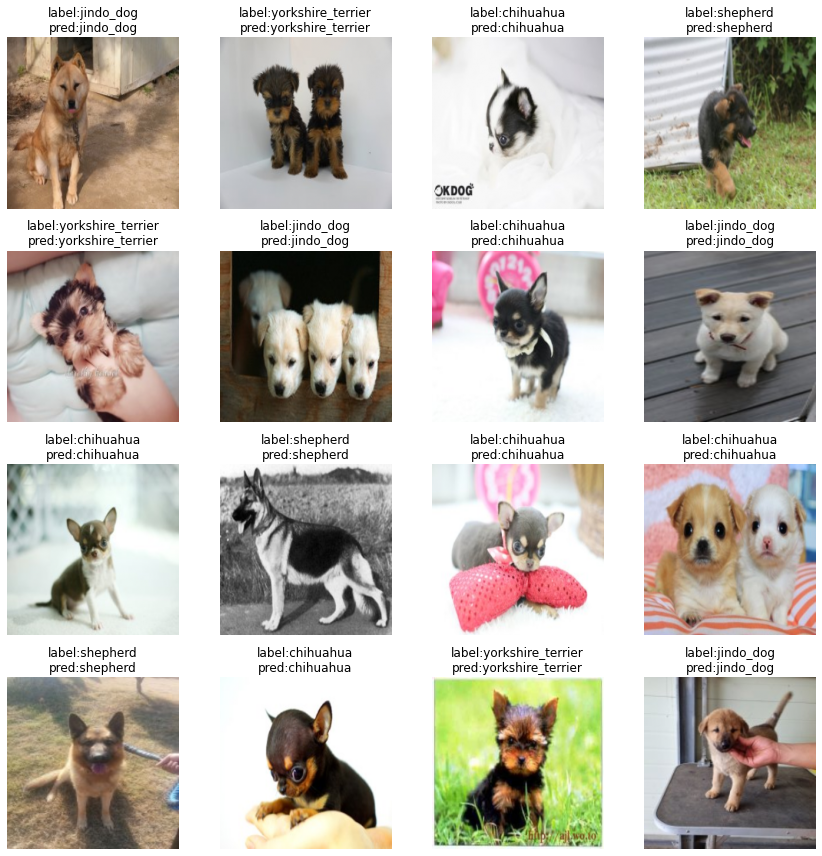

In [102]:
import matplotlib.pyplot as plt

class_names = ['chihuahua', 'jindo_dog', 'shepherd', 'yorkshire_terrier']

plt.figure(figsize=(12,12))

for pos in range(len(pred)):

    plt.subplot(4,4,pos+1)
    plt.axis('off')

    label_str = class_names[label_array[pos]]
    pred_str = class_names[np.argmax(pred[pos])]

    plt.title('label:' + label_str + '\npred:' + pred_str)

    plt.imshow(src_img_array[pos])

plt.tight_layout()
plt.show()

# 개별 이미지 테스트

In [103]:
import cv2

# 개별 이미지 테스트

ppoppy_list = []

 
ppoppy1 = cv2.imread(os.path.join(DATA_ROOT_DIR,'yorkshire_terrier.ppoppy1.jpg'), cv2.IMREAD_COLOR)
ppoppy1 = cv2.resize(ppoppy1, dsize=(IMG_WIDTH, IMG_HEIGHT))
ppoppy1 = cv2.cvtColor(ppoppy1, cv2.COLOR_BGR2RGB)
ppoppy1 = ppoppy1 / 255.0

ppoppy2 = cv2.imread(os.path.join(DATA_ROOT_DIR, 'yorkshire_terrier.ppoppy2.jpg'), cv2.IMREAD_COLOR)
ppoppy2 = cv2.resize(ppoppy2, dsize=(IMG_WIDTH, IMG_HEIGHT))
ppoppy2 = cv2.cvtColor(ppoppy2, cv2.COLOR_BGR2RGB)
ppoppy2 = ppoppy2 / 255.0

ppoppy3 = cv2.imread(os.path.join(DATA_ROOT_DIR,'yorkshire_terrier.ppoppy3.jpg'), cv2.IMREAD_COLOR)
ppoppy3 = cv2.resize(ppoppy3, dsize=(IMG_WIDTH, IMG_HEIGHT))
ppoppy3 = cv2.cvtColor(ppoppy3, cv2.COLOR_BGR2RGB)
ppoppy3 = ppoppy3 / 255.0

ppoppy_list.append(ppoppy1)
ppoppy_list.append(ppoppy2)
ppoppy_list.append(ppoppy3)

ppoppy_array = np.array(ppoppy_list)

print(ppoppy_array.shape)

(3, 224, 224, 3)


In [104]:
ppoppy_pred = model.predict(ppoppy_array)

print(ppoppy_pred.shape)

(3, 4)


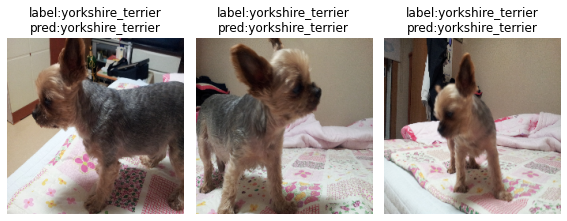

In [105]:
import matplotlib.pyplot as plt

class_names = class_names = ['chihuahua', 'jindo_dog', 'shepherd', 'yorkshire_terrier']

plt.figure(figsize=(8,8))

for pos in range(len(ppoppy_pred)):

    plt.subplot(1,3,pos+1)
    plt.axis('off')

    label_str = 'yorkshire_terrier'
    pred_str = class_names[np.argmax(ppoppy_pred[pos])]

    plt.title('label:' + label_str + '\npred:' + pred_str)

    plt.imshow(ppoppy_array[pos])

plt.tight_layout()
plt.show()